In [ ]:
# Make sure that the companion csv 'football_complete.csv' is in the SAME directory as this jupyter notebook
# Look up the documentation for any of these functions you don't understand; all of them are extremely helpful
# when looking at new data and trying to clean it up.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [66]:
df = pd.read_csv('../2017.csv')

In [47]:
# Example for plotting a basic chart to visualize the data

In [48]:
# Rushing attempts
x = list(df['Att'])

In [49]:
# Rushing yardage gained (total)
y = list(df['Yds'])

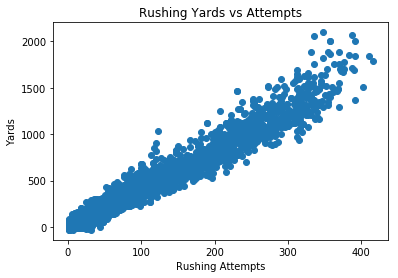

In [52]:
# Correlation between rushing yards and rushing attempts
plt.scatter(x, y)
plt.xlabel('Rushing Attempts')
plt.ylabel('Yards')
plt.title('Rushing Yards vs Attempts')
plt.show()
# plt.savefig('inclass_qbs.png') would save our graph to a png file if we desired

In [67]:
df.head(2)

,Rk,Unnamed: 1,Tm,Age,Pos,G,GS,Att,Yds,TD,...,TD.1,Lng.1,R/G,Y/G.1,Ctch%,Touch,Y/Tch,YScm,RRTD,Fmb
0,1,Le'Veon Bell*+\BellLe00,PIT,25,RB,15,15,321,1291,9,...,2.0,42.0,5.7,43.7,80.2%,406,4.8,1946,11,3
1,2,LeSean McCoy*\McCoLe01,BUF,29,RB,16,16,287,1138,6,...,2.0,39.0,3.7,28.0,76.6%,346,4.6,1586,8,3


In [70]:
df.isnull().values.any()

False

In [69]:
df = df.fillna(0)

In [71]:
df.columns.tolist()

['Rk',
 'Unnamed: 1',
 'Tm',
 'Age',
 'Pos',
 'G',
 'GS',
 'Att',
 'Yds',
 'TD',
 'Lng',
 'Y/A',
 'Y/G',
 'A/G',
 'Tgt',
 'Rec',
 'Yds.1',
 'Y/R',
 'TD.1',
 'Lng.1',
 'R/G',
 'Y/G.1',
 'Ctch%',
 'Touch',
 'Y/Tch',
 'YScm',
 'RRTD',
 'Fmb']

In [73]:
df = df.sort_values(by=['Yds', 'RRTD', 'Age'], ascending=False)

In [74]:
age_22 = df.loc[(df['Age']==22) & (df['GS']>9)]
age_22.head(2)

,Rk,Unnamed: 1,Tm,Age,Pos,G,GS,Att,Yds,TD,...,TD.1,Lng.1,R/G,Y/G.1,Ctch%,Touch,Y/Tch,YScm,RRTD,Fmb
5,6,Kareem Hunt*\HuntKa00,KAN,22,RB,16,16,272,1327,8,...,3.0,78.0,3.3,28.4,84.1%,325,5.5,1782,11,1
6,7,Leonard Fournette\FourLe00,JAX,22,RB,13,13,268,1040,9,...,1.0,28.0,2.8,23.2,75.0%,304,4.4,1342,10,2


In [75]:
df['t_pts'] = (df['Rec'] + df['RRTD']*6 + df['YScm']*.1)
df['f_ppg'] = (df['t_pts']/df['G']).round(1)

In [76]:
df.head(2)

,Rk,Unnamed: 1,Tm,Age,Pos,G,GS,Att,Yds,TD,...,R/G,Y/G.1,Ctch%,Touch,Y/Tch,YScm,RRTD,Fmb,t_pts,f_ppg
5,6,Kareem Hunt*\HuntKa00,KAN,22,RB,16,16,272,1327,8,...,3.3,28.4,84.1%,325,5.5,1782,11,1,297.2,18.6
3,4,Todd Gurley*+\GurlTo01,LAR,23,RB,15,15,279,1305,13,...,4.3,52.5,73.6%,343,6.1,2093,19,5,387.3,25.8


In [44]:
# TODO: Use df.apply() on our df so that our names column 
# (df['Unnamed: 1']) looks human-readable like 'Firstname Lastname'

In [45]:
# TODO: Set the names column as our index, rather than these arbitrary integers

In [46]:
# TODO: Make sure all of our data is numerical (type == float or int). This may mean
# dropping some columns, and our 'Ctch%' is also currently a str instead of float

In [ ]:
# To make comparisons, we will have a separate df of all players from 2017 that we can pull data from.
# We will then use that data (a row) to generate similarities based on cosines from our larger matrix
# All the linear algebra will actually be computed using the scikit-learn library along with pandas.
# We'll write a module for that later in the week once our data is ready for analysis.

In [77]:
df = df.drop('Pos', axis = 1)
df = df.drop('Tm', axis = 1)
df = df.drop('Rk', axis = 1)

In [82]:
df.columns

Index(['Age', 'G', 'GS', 'Att', 'Yds', 'TD', 'Lng', 'Y/A', 'Y/G', 'A/G', 'Tgt',
       'Rec', 'Yds.1', 'Y/R', 'TD.1', 'Lng.1', 'R/G', 'Y/G.1', 'Ctch%',
       'Touch', 'Y/Tch', 'YScm', 'RRTD', 'Fmb', 't_pts', 'f_ppg'],
      dtype='object')

In [80]:
def name_split(name):
    name = name.split('\\')[0]
    return name

df['Unnamed: 1'] = df.apply(lambda row: name_split(row['Unnamed: 1']), axis=1)


def name_strip(name):
    name = name.strip('*+\\')
    return name

df['Unnamed: 1'] = df.apply(lambda row: name_strip(row['Unnamed: 1']), axis=1)

In [81]:
df = df.set_index('Unnamed: 1')

In [86]:
df.to_csv('football_lookup.csv')

In [84]:
def catch_to_float(name):
    if type(name)==str:
        name =name.strip('%')
    name = float(name)
    return name
df['Ctch%'] = df.apply(lambda row: catch_to_float(row['Ctch%']), axis=1)

In [85]:
df.head()

,Age,G,GS,Att,Yds,TD,Lng,Y/A,Y/G,A/G,...,R/G,Y/G.1,Ctch%,Touch,Y/Tch,YScm,RRTD,Fmb,t_pts,f_ppg
Unnamed: 1,,,,,,,,,,,,,,,,,,,,,
Kareem Hunt,22,16,16,272,1327,8,69,4.9,82.9,17.0,...,3.3,28.4,84.1,325,5.5,1782,11,1,297.2,18.6
Todd Gurley,23,15,15,279,1305,13,57,4.7,87.0,18.6,...,4.3,52.5,73.6,343,6.1,2093,19,5,387.3,25.8
Le'Veon Bell,25,15,15,321,1291,9,27,4.0,86.1,21.4,...,5.7,43.7,80.2,406,4.8,1946,11,3,345.6,23.0
LeSean McCoy,29,16,16,287,1138,6,48,4.0,71.1,17.9,...,3.7,28.0,76.6,346,4.6,1586,8,3,265.6,16.6
Mark Ingram,28,16,13,230,1124,12,72,4.9,70.3,14.4,...,3.6,26.0,81.7,288,5.3,1540,12,3,284.0,17.8
